In [1]:
import requests  
from bs4 import BeautifulSoup 
import pandas as pd
import csv
import time
import matplotlib.pyplot as plt

In [2]:
url1 = "https://en.wikipedia.org/wiki/List_of_search_engines"

In [3]:
s = requests.Session()
response = s.get(url1, timeout=10)
#response2 = s.get(url2, timeout=5)
response


<Response [200]>

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')
pretty_soup = soup.prettify()

In [5]:
# title of Wikipedia page
soup.title.string

'List of search engines - Wikipedia'

In [9]:
all_tables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Name</th>
 <th>Language
 </th>
 <th>Backend ownership
 </th></tr>
 <tr>
 <td><a href="/wiki/Ask.com" title="Ask.com">Ask.com</a></td>
 <td>Multilingual
 </td>
 <td>Google <span class="flagicon"><a href="/wiki/United_States" title="United States"><img alt="United States" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/></a></span>
 </td></tr>
 <tr>
 <td><a href="/wiki/Baidu" title="Baidu">Baidu</a></td>
 <td><a href="/wiki/Chinese_language" title="Chinese language">Chinese</a>
 </td>
 <td>Baidu <span class="flag

In [10]:
# get right table to scrap
right_table=soup.find('table', {"class":'wikitable sortable'})

In [11]:
# Number of columns in the table
for row in right_table.findAll("tr"):
    cells = row.findAll('td')
len(cells)

3

In [12]:


# number of rows in the table including header
rows = right_table.findAll("tr")
len(rows)



30

In [23]:
# header attributes of the table
header = [th.text.rstrip() for th in rows[0].find_all('th')][0:]
print(header)
print('------------')
print(len(header))

['Name', 'Language', 'Backend ownership']
------------
3


In [24]:
lst_data = []
for row in rows[3:]:
            data = [d.text.rstrip() for d in row.find_all('td')]
            lst_data.append(data)

In [25]:


# select also works as find_all
lst_data1 = []
for row in rows[3:]:
            data = [d.text.rstrip() for d in row.select('td')]
            lst_data1.append(data)



In [16]:


# length of each record
len(lst_data1[0])



3

In [26]:


lst_data1 = pd.DataFrame(lst_data1, columns=header)
df = lst_data1.copy()
df.head(3)



,Name,Language,Backend ownership
0,Brave Search,Multilingual,Brave
1,Dogpile,English,Metasearch engine
2,DuckDuckGo,Multilingual,Microsoft Bing


In [27]:
len(df)

27

In [34]:
gr = df.groupby('Backend ownership').count().sort_values(by = 'Name').T
gr.T

,Name,Language
Backend ownership,,
"Apache 2.0 until 2021, then Elasticsearch",1,1
Apache License 2.0,1,1
Apache License 2.0 (Elasticsearch fork),1,1
Brave,1,1
Cloudview,1,1
GPL-2.0-or-later,1,1
Huawei,1,1
Mojeek,1,1
NetEase,1,1


In [186]:
df1 = df[df['Backend ownership'].isin(['Microsoft Bing', 'Metasearch engine', 'Google', 'Elasticsearch', 'Mojeek', 'NetEase'
   'Huawei', 'Brave' ])]
df1.groupby('Backend ownership')['Language'].sum()

Backend ownership
Brave                                                     Multilingual
Google                                             MultilingualEnglish
Metasearch engine                           EnglishEnglishMultilingual
Microsoft Bing       MultilingualMultilingualMultilingualEnglishMul...
Mojeek                                                    Multilingual
Name: Language, dtype: object

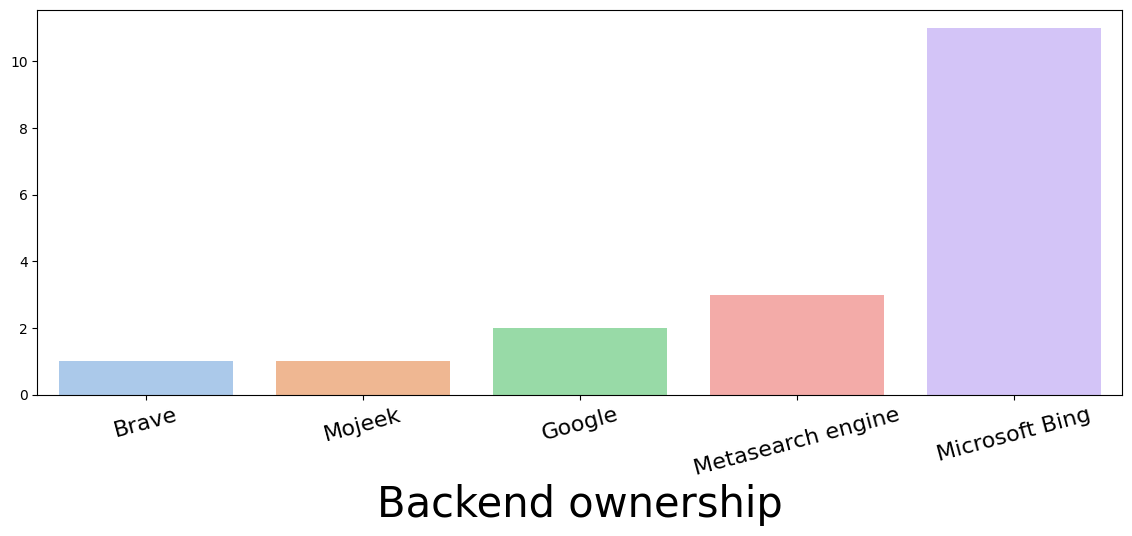

In [248]:
import seaborn as sns

group = df1.groupby('Backend ownership')['Name'].count().sort_values(ascending=True).T
#ax = group.plot(kind = 'bar')
ax, fig = plt.subplots(figsize=(14, 5), dpi=300)

ax = sns.countplot(data = df1, x = 'Backend ownership',
                    order = df1['Backend ownership'].value_counts(ascending=True).index,
                    palette=sns.color_palette("pastel"),
                    saturation= 0.75)
ax.tick_params(axis='x', labelrotation=15, labelsize=16)
ax.tick_params(axis='y')
ax.set_xlabel('Backend ownership', fontsize=30)
#ax.set_xlabel('')
ax.set_ylabel('')
#plt.subplots_adjust(top=0.9)
#plt.suptitle('Backend ownership', fontsize = 16)
plt.show()

In [201]:
gr = df1.groupby(['Backend ownership', 'Name'])['Name']
sorted(gr)

[(('Brave', 'Brave Search'),
  0    Brave Search
  Name: Name, dtype: object),
 (('Google', 'Google'),
  8    Google
  Name: Name, dtype: object),
 (('Google', 'Startpage'),
  19    Startpage
  Name: Name, dtype: object),
 (('Metasearch engine', 'Dogpile'),
  1    Dogpile
  Name: Name, dtype: object),
 (('Metasearch engine', 'MetaCrawler'),
  11    MetaCrawler
  Name: Name, dtype: object),
 (('Metasearch engine', 'Searx'),
  17    Searx
  Name: Name, dtype: object),
 (('Microsoft Bing', 'DuckDuckGo'),
  2    DuckDuckGo
  Name: Name, dtype: object),
 (('Microsoft Bing', 'Ecosia'),
  3    Ecosia
  Name: Name, dtype: object),
 (('Microsoft Bing', 'Excite†'),
  6    Excite†
  Name: Name, dtype: object),
 (('Microsoft Bing', 'HotBot'),
  9    HotBot
  Name: Name, dtype: object),
 (('Microsoft Bing', 'Lycos'),
  10    Lycos
  Name: Name, dtype: object),
 (('Microsoft Bing', 'Microsoft Bing'),
  12    Microsoft Bing
  Name: Name, dtype: object),
 (('Microsoft Bing', 'Qwant'),
  16    Qwant
  

In [187]:
gr = df1.groupby(['Backend ownership'])['Name'].transform(lambda x: x.fillna(x.count()))
gr


0       Brave Search
1            Dogpile
2         DuckDuckGo
3             Ecosia
6            Excite†
8             Google
9             HotBot
10             Lycos
11       MetaCrawler
12    Microsoft Bing
13            Mojeek
16             Qwant
17             Searx
19         Startpage
20         Swisscows
21        WebCrawler
23    Yahoo! Search†
26           You.com
Name: Name, dtype: object

[Text(0.5, 110.16666666666664, '')]

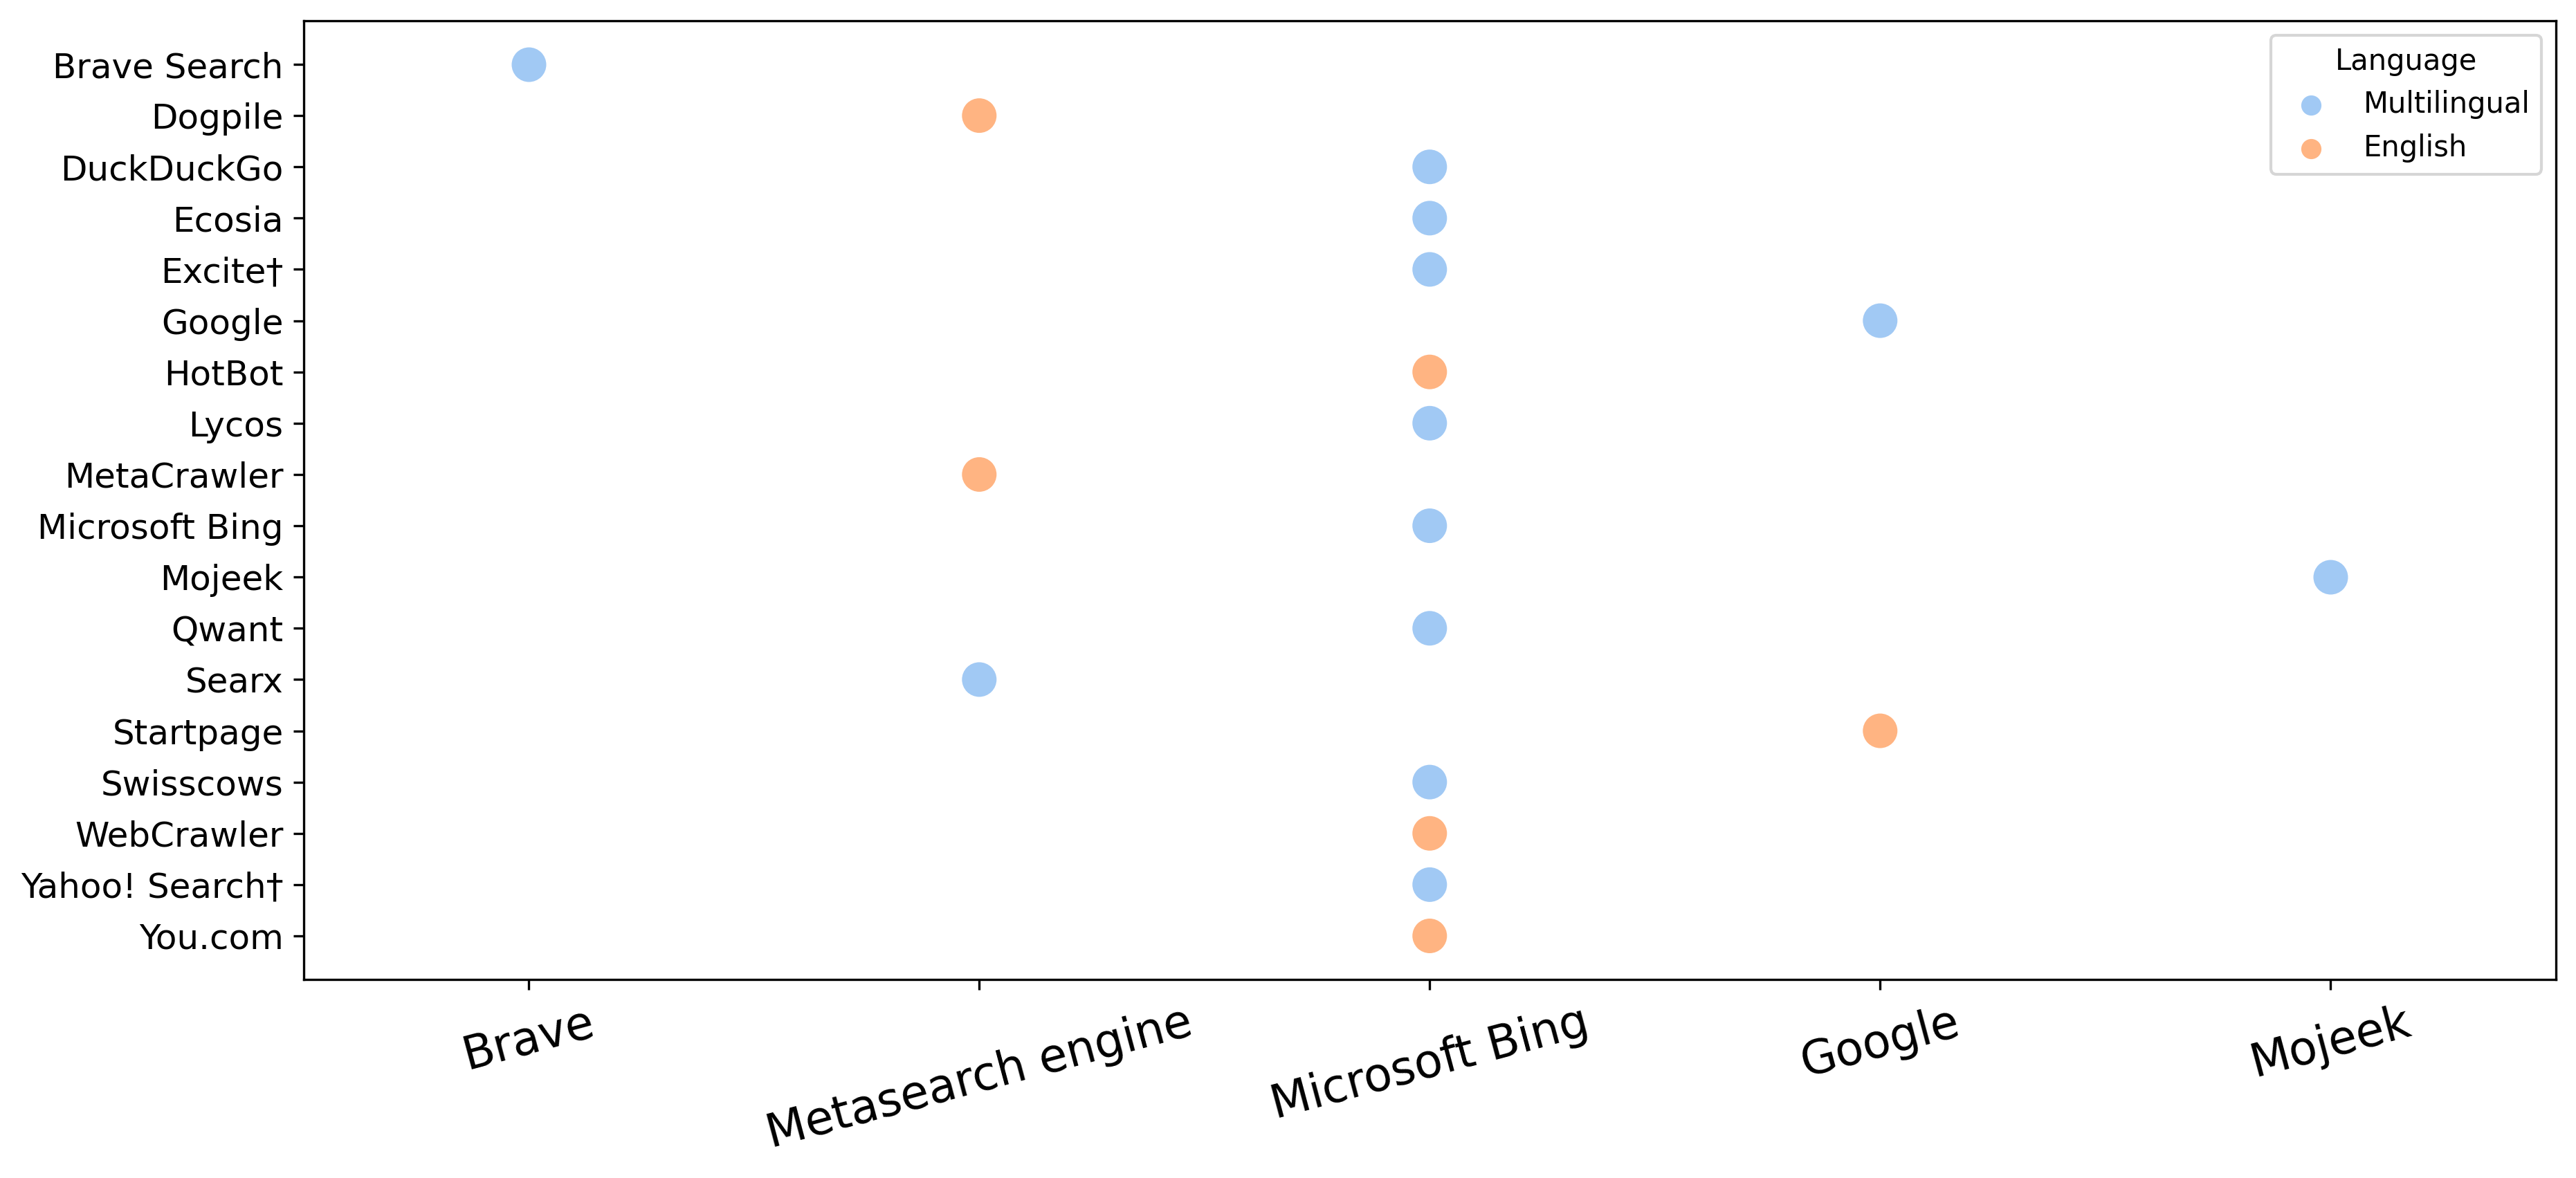

In [250]:
# Draw a categorical scatterplot to show each observation
ax, fig = plt.subplots(figsize=(14,6), dpi=300)
ax = sns.swarmplot(data=df1, palette=sns.color_palette("pastel", n_colors=2), x="Backend ownership", y="Name", hue="Language", size = 12)
ax.set(ylabel="")
ax.tick_params(axis='x', labelrotation=15, labelsize=16)
ax.tick_params(axis='y', labelsize=12)
ax.set(xlabel="")

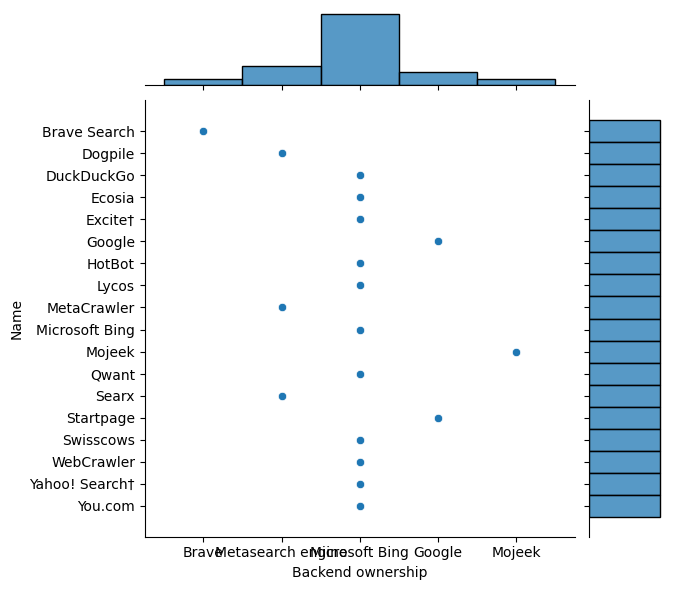

In [241]:
sns.jointplot(data=df1, x="Backend ownership", y="Name", palette=sns.color_palette("pastel"))

array([<AxesSubplot: >], dtype=object)

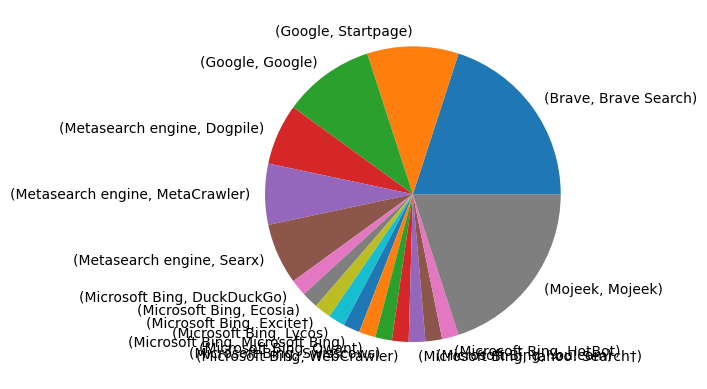

In [185]:
import numpy as np
#group = df1[['Backend ownership','Name']].groupby(['Backend ownership','Name']).value_counts(normalize=True)
group = df1[['Name','Backend ownership']].groupby(['Backend ownership']).value_counts(normalize=True)
sns.plo
#group.plot(kind = 'pie', subplots=True)

In [275]:
table = soup.find_all('table')[1]
rows = table.find_all('tr')
row_list = list()

for tr in rows:
    td = tr.find_all('td')
    row = [i.text.rstrip() for i in td]
    row_list.append(row)

#, 
lst_data1 = pd.DataFrame(row_list, columns=['Name', 'Language', 'Country'])

df = lst_data1.copy()
df.dropna(inplace=True)
df.head(3)
#print(row_list[1:])

,Name,Language,Country
1,Accoona,"Chinese, English","China, United States"
2,Biglobe,Japanese,Japan
3,Daum,Korean,Korea


In [277]:
df.groupby('Language').sum()

,Name,Country
Language,,
,RediffSearch.chSesamWalla!,"IndiaSwitzerlandNorway, SwedenIsrael"
"Arabic, English",Maktoob,Arab World
"Bengali, English",Pipilika,Bangladesh
"Chinese, English",Accoona,"China, United States"
Czech,Seznam,Czech Republic
English,ZipLocal,"Canada, United States"
"English, Hindi",Qmamu,India
"German, English",Fireball,Germany
Hungarian,Miner.hu,Hungary
